#### Lesson: LQ Control: Foundations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from quantecon import LQ

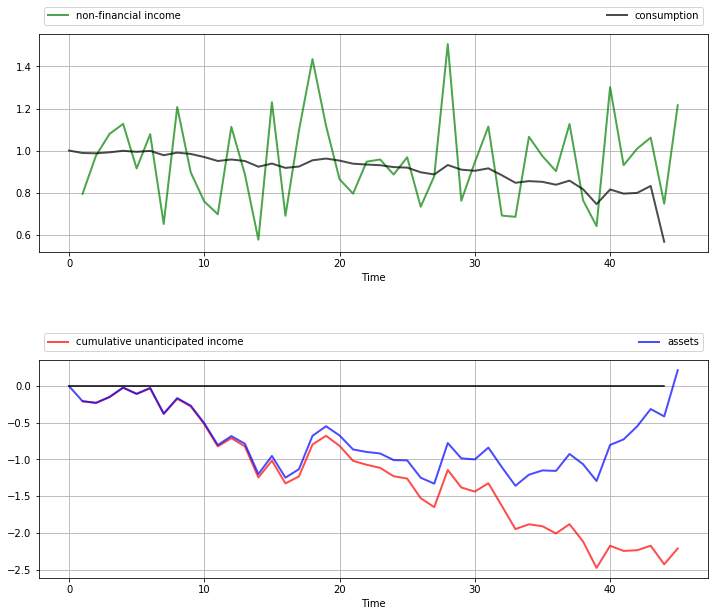

In [2]:
# Model parameters
r = 0.05
β = 1/(1 + r)
T = 45
c_bar = 2
σ = 0.25
μ = 1
q = 1e6

# Formulate as an LQ problem
Q = 1
R = np.zeros((2, 2))
Rf = np.zeros((2, 2))
Rf[0, 0] = q
A = [[1 + r, -c_bar + μ],
    [0,              1]]
B = [[-1],
    [ 0]]
C = [[σ],
    [0]]

# Compute solutions and simulate
lq = LQ(Q, R, A, B, C, beta=β, T=T, Rf=Rf)
x0 = (0, 1)
xp, up, wp = lq.compute_sequence(x0)

# Convert back to assets, consumption and income
assets = xp[0, :]           # a_t
c = up.flatten() + c_bar    # c_t
income = σ * wp[0, 1:] + μ  # y_t

# Plot results
n_rows = 2
fig, axes = plt.subplots(n_rows, 1, figsize=(12, 10))

plt.subplots_adjust(hspace=0.5)

bbox = (0., 1.02, 1., .102)
legend_args = {'bbox_to_anchor': bbox, 'loc': 3, 'mode': 'expand'}
p_args = {'lw': 2, 'alpha': 0.7}

axes[0].plot(list(range(1, T+1)), income, 'g-', label="non-financial income",
            **p_args)
axes[0].plot(list(range(T)), c, 'k-', label="consumption", **p_args)

axes[1].plot(list(range(1, T+1)), np.cumsum(income - μ), 'r-',
            label="cumulative unanticipated income", **p_args)
axes[1].plot(list(range(T+1)), assets, 'b-', label="assets", **p_args)
axes[1].plot(list(range(T)), np.zeros(T), 'k-')

for ax in axes:
    ax.grid()
    ax.set_xlabel('Time')
    ax.legend(ncol=2, **legend_args)

plt.show()

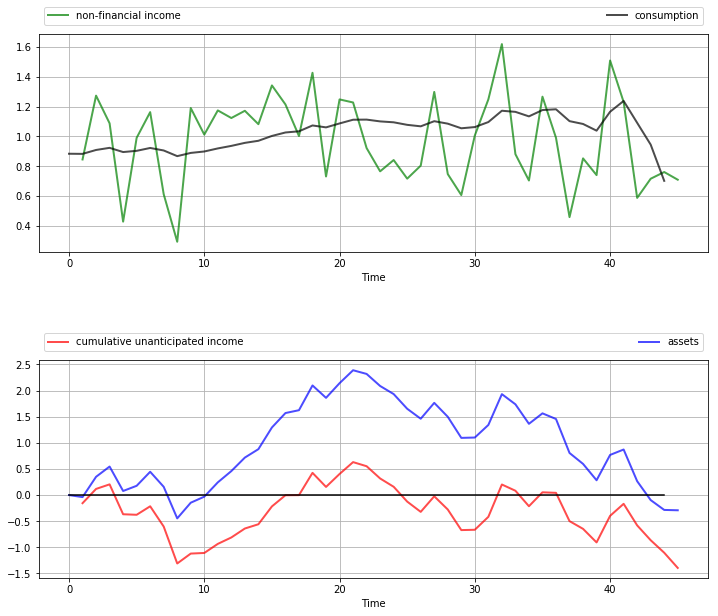

In [3]:
# Compute solutions and simulate
lq = LQ(Q, R, A, B, C, beta=0.96, T=T, Rf=Rf)
x0 = (0, 1)
xp, up, wp = lq.compute_sequence(x0)

# Convert back to assets, consumption and income
assets = xp[0, :]           # a_t
c = up.flatten() + c_bar    # c_t
income = σ * wp[0, 1:] + μ  # y_t

# Plot results
n_rows = 2
fig, axes = plt.subplots(n_rows, 1, figsize=(12, 10))

plt.subplots_adjust(hspace=0.5)

bbox = (0., 1.02, 1., .102)
legend_args = {'bbox_to_anchor': bbox, 'loc': 3, 'mode': 'expand'}
p_args = {'lw': 2, 'alpha': 0.7}

axes[0].plot(list(range(1, T+1)), income, 'g-', label="non-financial income",
             **p_args)
axes[0].plot(list(range(T)), c, 'k-', label="consumption", **p_args)

axes[1].plot(list(range(1, T+1)), np.cumsum(income - μ), 'r-',
             label="cumulative unanticipated income", **p_args)
axes[1].plot(list(range(T+1)), assets, 'b-', label="assets", **p_args)
axes[1].plot(list(range(T)), np.zeros(T), 'k-')

for ax in axes:
    ax.grid()
    ax.set_xlabel('Time')
    ax.legend(ncol=2, **legend_args)

plt.show()